In [51]:
from sklearn import datasets as ds 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

data_x , data_y = ds.load_svmlight_file('australian.txt')
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)
x_train_array = x_train.toarray()
x_test_array = x_test.toarray()

(552, 14)


In [52]:
#初始化参数值
theta_array = np.zeros(15)
descent_array = np.zeros(15)
col_theta, = theta_array.shape

rate = 0.0001
C = 0.1

row_train ,col_train = x_train_array.shape
train_column = np.ones(row_train)
x_train_array = np.column_stack((x_train_array,train_column))
row_train ,col_train = x_train_array.shape

row_test, col_test = x_test_array.shape
test_column = np.ones(row_test)
x_test_array = np.column_stack((x_test_array,test_column))
row_test, col_test = x_test_array.shape

(552, 15)


In [34]:
def compute_function(x):
    sum = 0
    for i in range(col_theta):
        sum = sum + theta_array[i] * x[i]
    return sum

In [35]:
def compute_sum():
    sum = np.zeros(15)
    for x,y in zip(x_train_array,y_train):
        if 1 - y * compute_function(x) >= 0 :
            sum = sum - y * x
    return sum

In [36]:
def compute_descent():
    return theta_array + C * compute_sum()

In [37]:
def train_loss():
    sum_loss = 0
    
    for i in range(col_theta):
        sum_loss = sum_loss + theta_array[i] * theta_array[i]
    sum_loss = sum_loss / 2
    
    for x_term,y_term in zip(x_train_array,y_train):
        sum_loss = sum_loss + C * max( 0 , 1 - y_term * compute_function(x_term) )
         
    return sum_loss 

In [38]:
def test_loss():
    sum_loss = 0
    
    for i in range(col_theta):
        sum_loss = sum_loss + theta_array[i] * theta_array[i]
    sum_loss = sum_loss / 2
    
    for x_term,y_term in zip(x_test_array,y_test):
        sum_loss = sum_loss + C * max( 0 , 1 - y_term * compute_function(x_term) ) 
         
    return sum_loss 

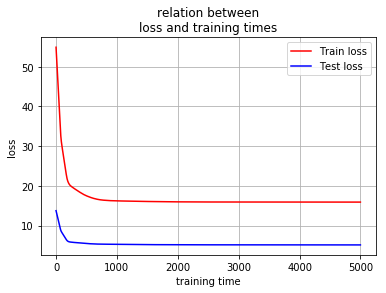

In [53]:
#循环1000次 循环改变梯度每个分量 分量的每个里面的g(x)  g(x)里的判断
loss_train_tuple = []
loss_test_tupe = []
for i in range(5000):
    descent_array = compute_descent()
    theta_array = theta_array - rate * descent_array
    loss_train_tuple.append(train_loss())
    loss_test_tupe.append(test_loss())
plt.title('relation between\nloss and training times')
plt.xlabel('training time')
plt.ylabel('loss')
plt.plot(loss_train_tuple,label = 'Train loss',color = 'red')
plt.plot(loss_test_tupe,label = 'Test loss',color = 'blue')
plt.legend(loc='upper right')
plt.grid()
plt.show()